In [2]:
#importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
# reading the file
df = pd.read_csv(r"Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
# getting the details about the columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
# checking for the null values in the dataset
df.isnull().any()

ID                           False
year                         False
loan_limit                    True
Gender                       False
approv_in_adv                 True
loan_type                    False
loan_purpose                  True
Credit_Worthiness            False
open_credit                  False
business_or_commercial       False
loan_amount                  False
rate_of_interest              True
Interest_rate_spread          True
Upfront_charges               True
term                          True
Neg_ammortization             True
interest_only                False
lump_sum_payment             False
property_value                True
construction_type            False
occupancy_type               False
Secured_by                   False
total_units                  False
income                        True
credit_type                  False
Credit_Score                 False
co-applicant_credit_type     False
age                           True
submission_of_applic

Most of the columns contain null values. Lets visualize them.

<AxesSubplot:>

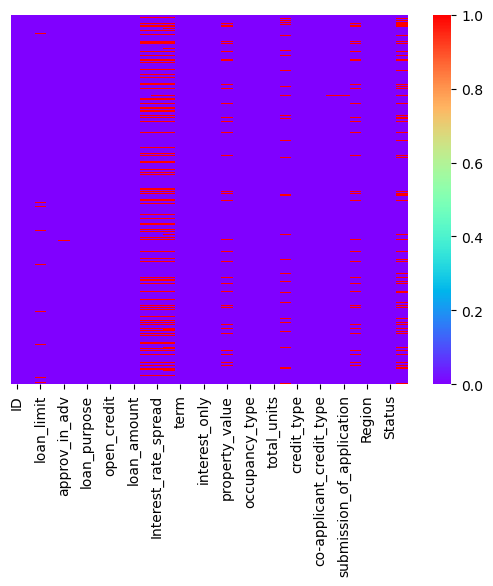

In [6]:
# using the heatmap() function
sns.heatmap(df.isnull(),cmap='rainbow',yticklabels=False)

In [7]:
# dropping the year column as it do not works as a contributin feature for the classification
df.drop(['year'],inplace=True,axis=1)

In [8]:
df.head()

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [9]:
# getting the count of the null values
df.isna().sum()

ID                               0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                 

In [10]:
# separating the numerical and categorical columns 
numerical_col = df.select_dtypes(include=[np.number])
categorical_col = df.select_dtypes(exclude=[np.number])

In [11]:
# numerical columns
numerical_col.head()

,ID,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890,116500,NaN,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,24891,206500,NaN,NaN,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,24892,406500,4.56,0.2000,595.0,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,24893,456500,4.25,0.6810,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,24894,696500,4.00,0.3042,0.0,360.0,758000.0,10440.0,602,91.886544,0,39.0


In [12]:
# categorical columns
categorical_col.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


<AxesSubplot:>

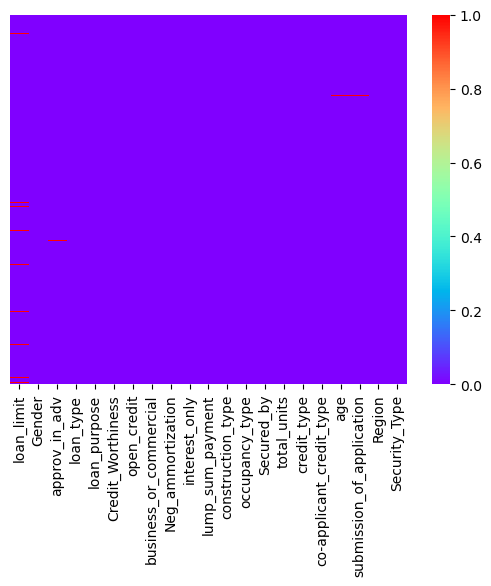

In [13]:
sns.heatmap(categorical_col.isnull(),cmap='rainbow',yticklabels=False)

In [14]:
# filling the categorical variables with the mode
for i in categorical_col.columns:
    mode = categorical_col[i].mode()
    mode = mode[0]
    categorical_col[i].fillna(value=mode, inplace=True)

<AxesSubplot:>

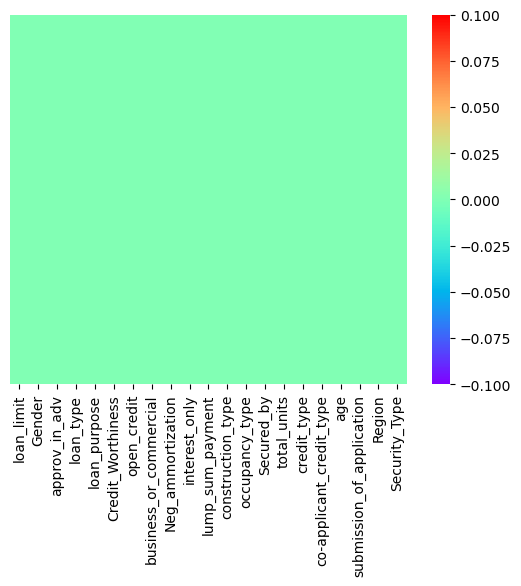

In [15]:
sns.heatmap(categorical_col.isnull(),cmap='rainbow',yticklabels=False)

In [16]:
lb = LabelEncoder()
for i in categorical_col.columns:
    categorical_col[i] = lb.fit_transform(categorical_col[i])

In [17]:
categorical_col.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,0,3,0,0,0,0,0,1,1,1,...,1,1,0,0,3,0,0,1,3,1
1,0,2,0,1,0,0,0,0,1,1,...,1,1,0,0,2,1,3,1,0,1
2,0,2,1,0,0,0,0,1,0,1,...,1,1,0,0,3,0,1,1,3,1
3,0,2,0,0,3,0,0,1,1,1,...,1,1,0,0,3,0,2,0,0,1
4,0,1,1,0,0,0,0,1,1,1,...,1,1,0,0,1,1,0,0,0,1


Categorical variables are now free from nul values

<AxesSubplot:>

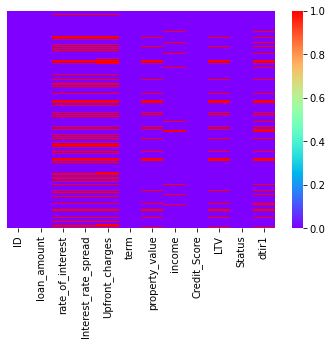

In [133]:
# now the numerical_col
sns.heatmap(numerical_col.isnull(),cmap='rainbow',yticklabels=False)

In [134]:
# filling the null values of numerical col with mean of that feature
for i in numerical_col.columns:
    numerical_col[i] = numerical_col[i].fillna(numerical_col[i].mean())

C:\Users\PRAKHA~1\AppData\Local\Temp/ipykernel_17344/651091162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_col[i] = numerical_col[i].fillna(numerical_col[i].mean())


<AxesSubplot:>

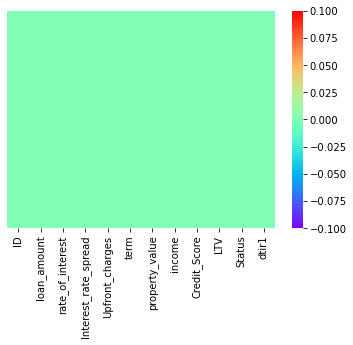

In [135]:
# now checking for the null values 
sns.heatmap(numerical_col.isnull(),cmap='rainbow',yticklabels=False)

In [136]:
df_full = pd.concat([categorical_col, numerical_col], axis=1, join='inner')
df_full.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,0,3,0,0,0,0,0,1,1,1,...,4.045476,0.441656,3224.996127,360.0,118000.000000,1740.0,758,98.728814,1,45.000000
1,0,2,0,1,0,0,0,0,1,1,...,4.045476,0.441656,3224.996127,360.0,497893.465696,4980.0,552,72.746457,1,37.732932
2,0,2,1,0,0,0,0,1,0,1,...,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834,80.019685,0,46.000000
3,0,2,0,0,3,0,0,1,1,1,...,4.250000,0.681000,3224.996127,360.0,658000.000000,11880.0,587,69.376900,0,42.000000
4,0,1,1,0,0,0,0,1,1,1,...,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602,91.886544,0,39.000000


In [137]:
df = df_full[[c for c in df if c not in ['Status']] + ['Status']]
df.head()

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1,Status
0,24890,0,3,0,0,0,0,0,1,116500,...,3,758,0,0,1,98.728814,3,1,45.000000,1
1,24891,0,2,0,1,0,0,0,0,206500,...,2,552,1,3,1,72.746457,0,1,37.732932,1
2,24892,0,2,1,0,0,0,0,1,406500,...,3,834,0,1,1,80.019685,3,1,46.000000,0
3,24893,0,2,0,0,3,0,0,1,456500,...,3,587,0,2,0,69.376900,0,1,42.000000,0
4,24894,0,1,1,0,0,0,0,1,696500,...,1,602,1,0,0,91.886544,0,1,39.000000,0


<AxesSubplot:>

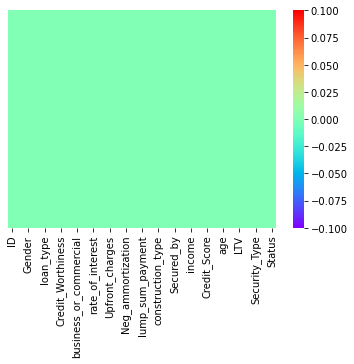

In [138]:
# checking for the null values in updated dataframe
sns.heatmap(df.isnull(),cmap='rainbow',yticklabels=False)

In [139]:
# number of rows & columns in the updated dataset
df.shape

(148670, 33)

In [140]:
df.columns

Index(['ID', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'dtir1', 'Status'],
      dtype='object')

In [141]:
# splitting the dataset into train and test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1:], test_size = 0.3, random_state=1)

In [142]:
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

In [143]:
df.columns

Index(['ID', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'dtir1', 'Status'],
      dtype='object')

In [144]:
# cols

In [145]:
# X_train_std = pd.DataFrame(X_train_std, columns=cols)
# X_test_std = pd.DataFrame(X_test_std, columns=cols)

In [146]:
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=500, random_state=1)

In [154]:
# finding the importance of the model 
importances = forest.feature_importances_
for i in range(X_train.shape[1]):
    #print(i,")",df.columns[i+1]," : ",importances[i])
    print("%2d) %-*s %f" % (i + 1, 30,
                            df.columns[i],
                            importances[i]))

 1) ID                             0.000666
 2) loan_limit                     0.000874
 3) Gender                         0.000750
 4) approv_in_adv                  0.000394
 5) loan_type                      0.003502
 6) loan_purpose                   0.001611
 7) Credit_Worthiness              0.000630
 8) open_credit                    0.000688
 9) business_or_commercial         0.003234
10) loan_amount                    0.003636
11) rate_of_interest               0.300182
12) Interest_rate_spread           0.276633
13) Upfront_charges                0.247469
14) term                           0.002163
15) Neg_ammortization              0.004159
16) interest_only                  0.000371
17) lump_sum_payment               0.007182
18) property_value                 0.035858
19) construction_type              0.000007
20) occupancy_type                 0.000250
21) Secured_by                     0.000005
22) total_units                    0.000085
23) income                      

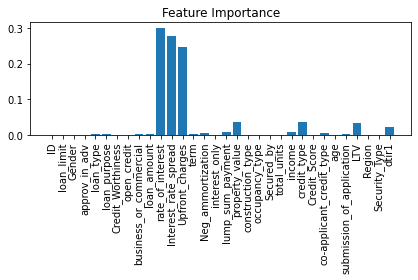

In [155]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

In [156]:
df.columns

Index(['ID', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'dtir1', 'Status'],
      dtype='object')

In [159]:
# redefinning the X
col = ['rate_of_interest','Interest_rate_spread', 'Upfront_charges','property_value','credit_type','LTV']
X = df[col]
X.shape

(148670, 6)

In [170]:
# splitting the dataset into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, df.iloc[:, -1:], test_size = 0.2, random_state=1)

In [171]:
X_train.shape

(118936, 6)

In [176]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier()

In [177]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [178]:
accuracy_score(y_test,y_pred)

0.9998991054012242